# importing neccessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# EDA analysis

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.dropna(axis='index',how='any',subset=['ph'],inplace=True)

# imputing missing values with their median

In [7]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df)

SimpleImputer()

In [8]:
X = imputer.transform(df)

In [9]:
df1 = pd.DataFrame(X, columns=df.columns)

In [10]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

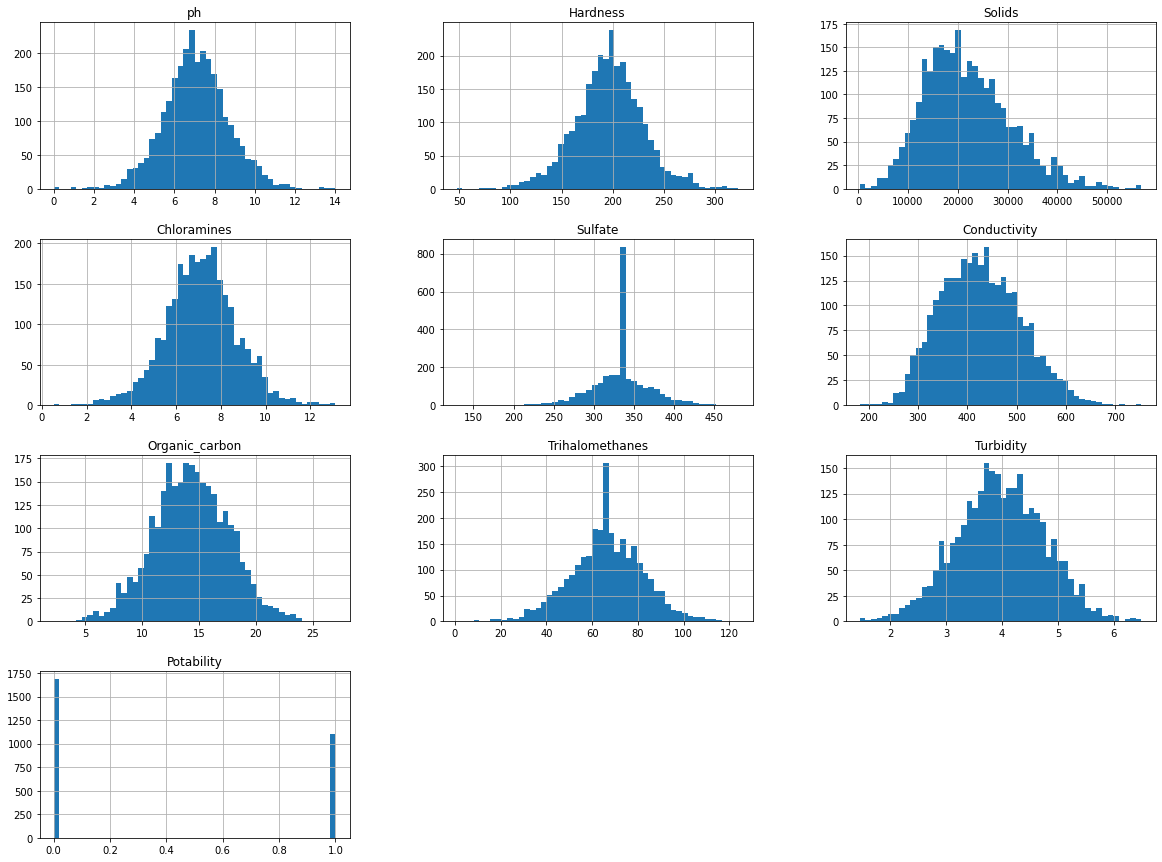

In [11]:
df1.hist(bins=50, figsize=(20, 15))

In [12]:
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,129.422921,18630.057858,6.635246,333.312912,592.885359,15.180013,56.329076,4.500656,0.0
1,8.099124,224.236259,19909.541732,9.275884,333.312912,418.606213,16.868637,66.420093,3.055934,0.0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0


In [13]:
corr_matrix = df1.corr()
corr_matrix['ph'].sort_values(ascending=False)

ph                 1.000000
Hardness           0.082096
Organic_carbon     0.043503
Conductivity       0.018614
Sulfate            0.015786
Trihalomethanes    0.003251
Potability        -0.003556
Chloramines       -0.034350
Turbidity         -0.039057
Solids            -0.089288
Name: ph, dtype: float64

array([[<AxesSubplot:xlabel='ph', ylabel='ph'>,
        <AxesSubplot:xlabel='Hardness', ylabel='ph'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='ph'>,
        <AxesSubplot:xlabel='Solids', ylabel='ph'>],
       [<AxesSubplot:xlabel='ph', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Hardness', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='Hardness'>,
        <AxesSubplot:xlabel='Solids', ylabel='Hardness'>],
       [<AxesSubplot:xlabel='ph', ylabel='Organic_carbon'>,
        <AxesSubplot:xlabel='Hardness', ylabel='Organic_carbon'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='Organic_carbon'>,
        <AxesSubplot:xlabel='Solids', ylabel='Organic_carbon'>],
       [<AxesSubplot:xlabel='ph', ylabel='Solids'>,
        <AxesSubplot:xlabel='Hardness', ylabel='Solids'>,
        <AxesSubplot:xlabel='Organic_carbon', ylabel='Solids'>,
        <AxesSubplot:xlabel='Solids', ylabel='Solids'>]], dtype=object)

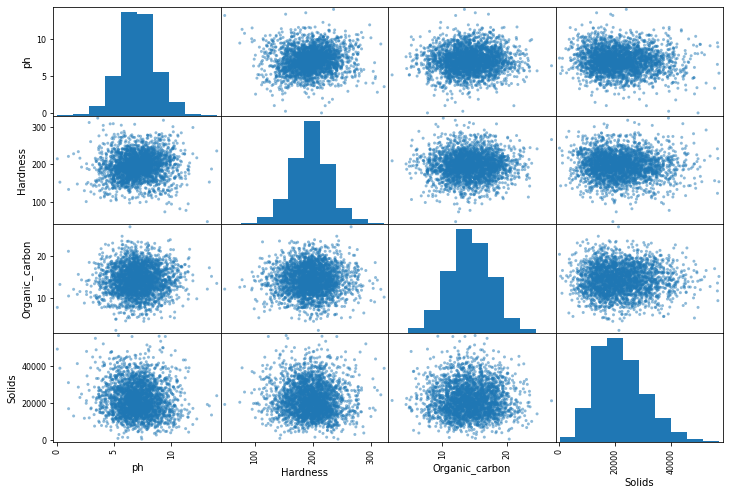

In [14]:
attributes = ["ph", "Hardness", "Organic_carbon", "Solids"]
scatter_matrix(df1[attributes], figsize = (12,8))

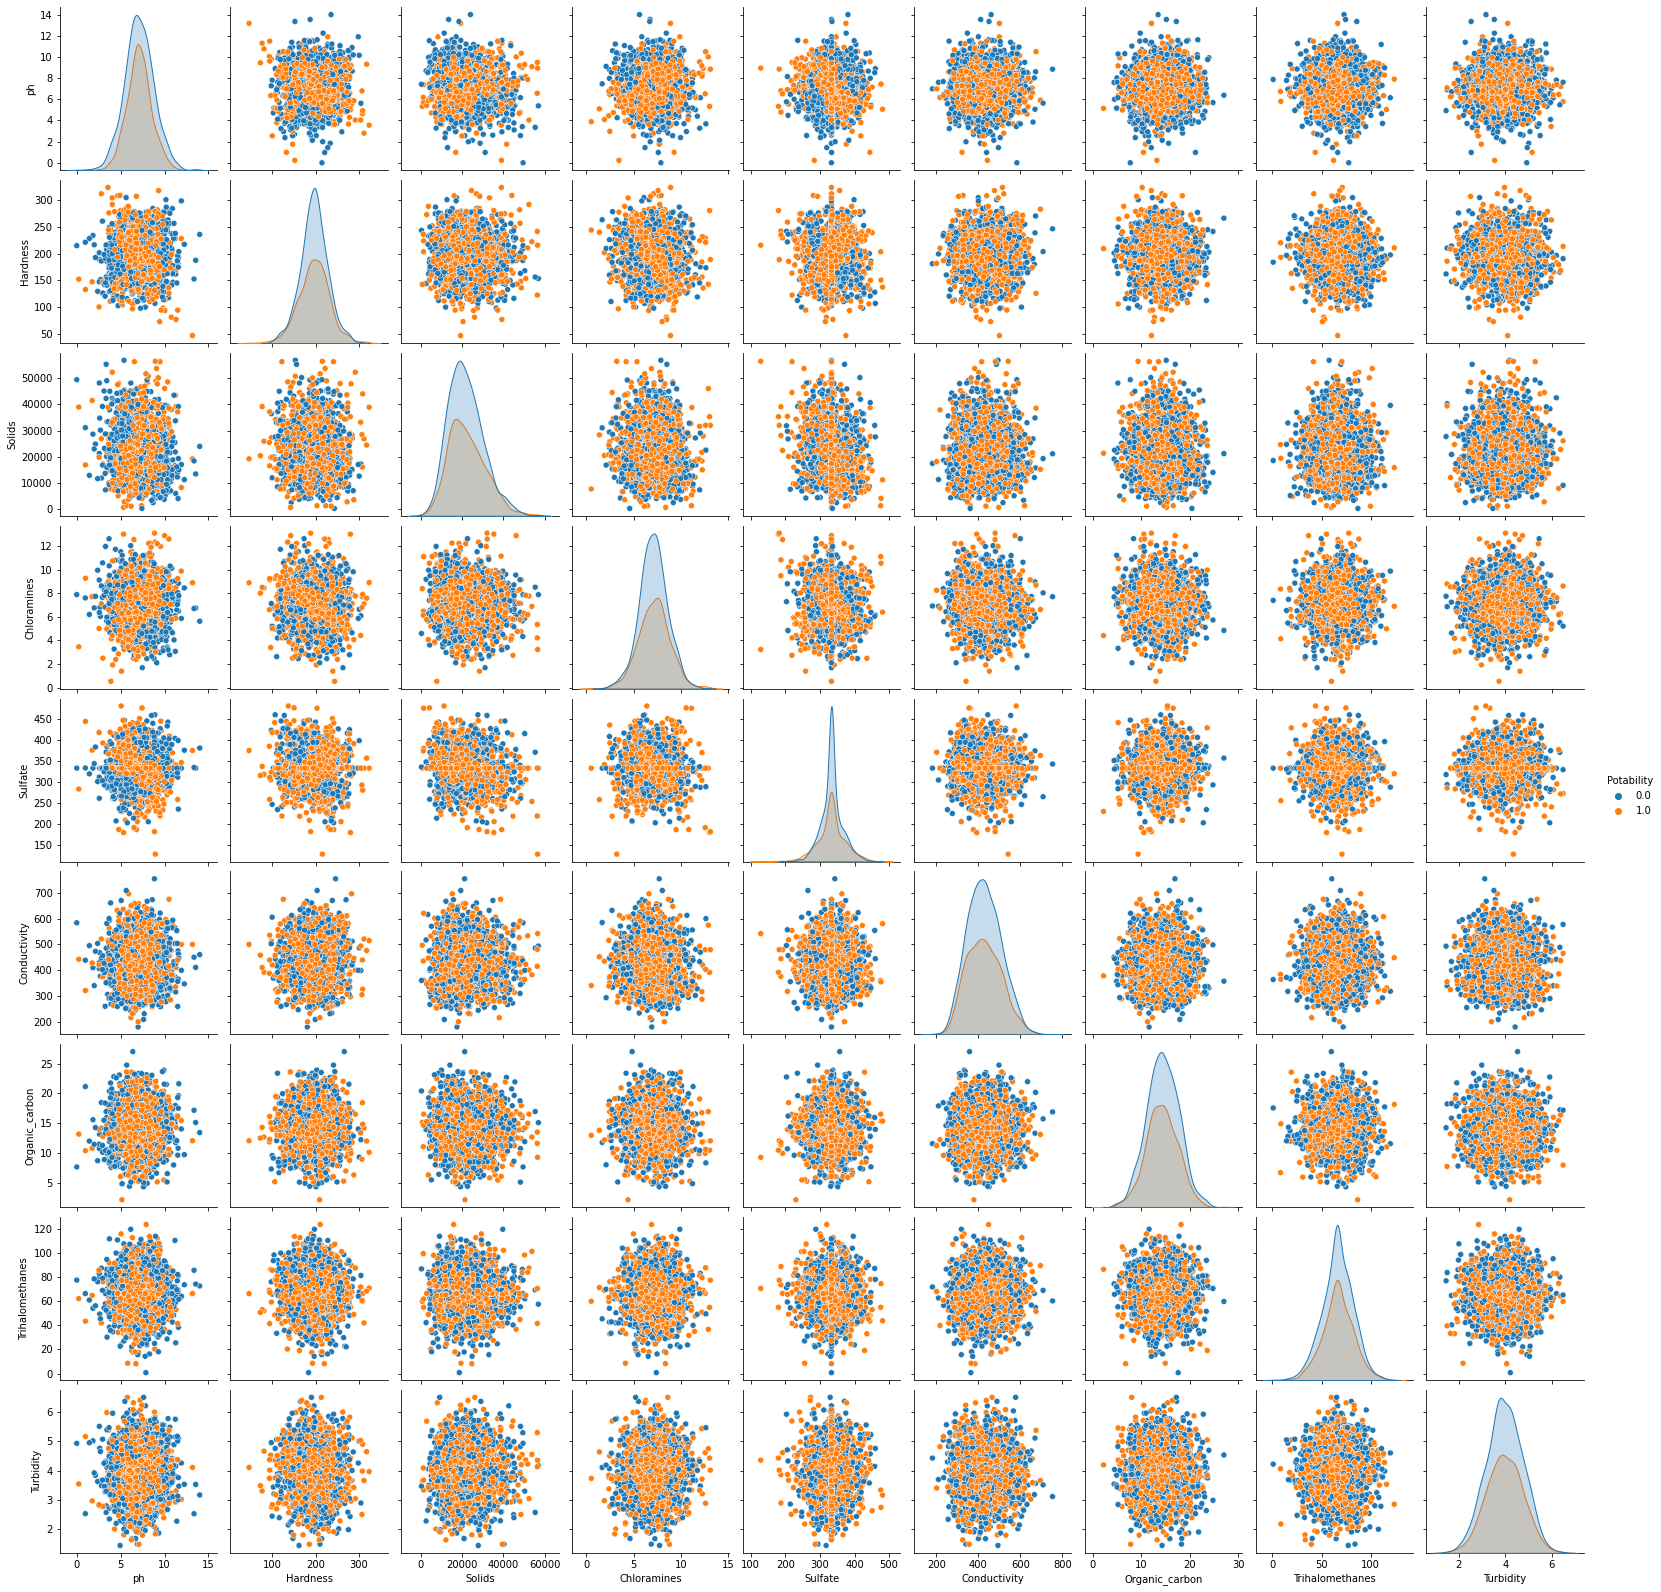

In [15]:
sns.pairplot(df1,hue='Potability')

In [16]:
# since their is no corelation the possibility of working of linear regression is less

# train-test-split

In [17]:
train_set, test_set  = train_test_split(df1, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 2228
Rows in test set: 557



In [18]:
train_set['Potability'].value_counts()

0.0    1351
1.0     877
Name: Potability, dtype: int64

In [19]:
test_set['Potability'].value_counts()

0.0    333
1.0    224
Name: Potability, dtype: int64

In [20]:
train_x=train_set.drop(labels='Potability',axis=1)
train_y=train_set['Potability']
train_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
238,7.958984,171.483625,23625.813886,9.537735,259.979966,327.623881,16.117110,107.754043,4.698008
599,5.393346,172.550261,28099.038729,5.789669,372.621943,505.542349,17.530704,67.273874,4.633855
1518,9.252857,168.040751,50279.262429,5.905056,415.450810,400.003589,11.949854,62.256881,3.300586
2745,6.603417,190.837308,19468.790095,6.375632,380.731901,456.315460,5.934588,83.559326,4.270817
100,7.371085,207.716824,24913.837166,9.616330,362.300180,363.168538,11.542662,67.720704,4.412590


In [21]:
train_y.head()

238     1.0
599     1.0
1518    0.0
2745    1.0
100     0.0
Name: Potability, dtype: float64

In [22]:
test_x=test_set.drop(labels='Potability',axis=1)
test_y=test_set['Potability']
test_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2078,6.569054,208.731454,29123.708304,6.765118,327.697541,308.086050,12.360292,65.750173,4.204699
2769,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,66.491551,4.333953
1465,8.927906,188.054419,22139.878848,4.252721,376.334566,438.515587,8.597973,92.828321,5.474355
2089,5.097786,182.819015,23590.313712,9.128798,326.334863,445.562644,15.137781,68.608103,4.829323
2118,8.237092,212.818563,24414.973485,5.413978,333.312912,445.555901,12.409910,48.560914,3.686074


In [23]:
test_y.head()

2078    1.0
2769    1.0
1465    0.0
2089    0.0
2118    0.0
Name: Potability, dtype: float64

# importing the models

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# model = DecisionTreeClassifier()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
# model = RandomForestClassifier()
# model = XGBRegressor()
# model = XGBClassifier()
model = KNeighborsClassifier(n_neighbors=1)
# model = KNeighborsRegressor(n_neighbors=1)
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1)

# calculation for n_neighbour

In [25]:
accuracy_rate = []

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(model, train_x, train_y, cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy rate')

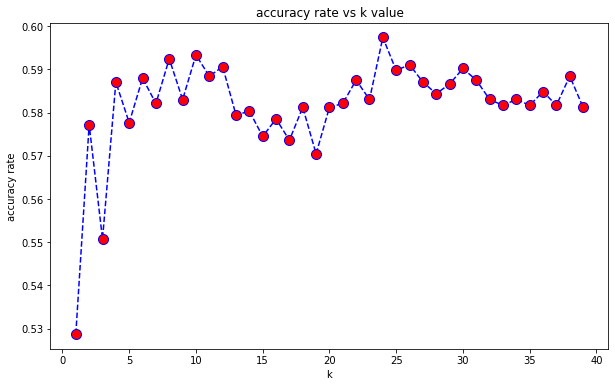

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('accuracy rate')

# calculating accuracy

In [27]:
scores = cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [28]:
rmse_scores

array([0.62818694, 0.66964953, 0.64578662, 0.65611986, 0.65269363,
       0.62100743, 0.65269363, 0.6595283 , 0.67450349, 0.60775766])

In [29]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [30]:
print_scores(rmse_scores)

Scores: [0.62818694 0.66964953 0.64578662 0.65611986 0.65269363 0.62100743
 0.65269363 0.6595283  0.67450349 0.60775766]
Mean:  0.6467927076578147
Standard deviation:  0.020359167671151177


In [31]:
# DecisionTreeRegressor=64% accuracy
# RandomForestRegressor=46% accuracy
# XGBRegressor=50% accuracy
# KNNclassifier=68% accuracy
# DecisionTreeClassifier=63% accuracy
# RandomForestClassifier=57% accuracy
# XGBClassifier=59% accuracy
# KNNregressor=68% accuracy